# <font color='red'>Primo Notebook</font>

In questo primo notebook studieremo un algoritmo che permette di classificare i jet adronici in base ai valori delle variabili discriminanti. Studieremo anche un metodo per valutare l'efficienza di queste variabili, ovvero la curva ROC.

# Obiettivi:

* Familiarizzare con alcuni comandi di base del linguaggio di programmazione Python 3;
* Visualizzare il set di dati esplicitamente e graficamente;
* Preparare il set di dati per un'analisi vera e propria;
* Valutare l'efficienza delle variabili discriminanti, prima "a occhio" e poi in maniera formale col metodo della curva ROC.

# Comandi Preliminari
Nelle prime tre celle vengono scaricati i dati da google drive e immagazzinati in modo da renderli disponibili all'interno del notebook. Vengono inoltre caricate alcune librerie esterne che ci serviranno per la nostra analisi.

In [1]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot
import os
if os.path.isfile('test93_0_20000.npz') :
    print ("File already downloaded")
else:
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RhxZfiQFp7GidUS_ayJADDdQM6OfG3ye' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1RhxZfiQFp7GidUS_ayJADDdQM6OfG3ye" -O test93_0_20000.npz && rm -rf /tmp/cookies.txt
  

File already downloaded


In [2]:
os.path.isfile('test93_0_20000.npz')

import glob
glob.glob("*npz")

['test93_20000_40000.npz', 'test93_0_20000.npz']

In [3]:
import numpy

f=numpy.load("test93_0_20000.npz")

dati = f["arr_0"]

Alla fine di questo processo i dati con cui lavoreremo sono immagazzinati nella variabile "dati"

In [4]:
dati.shape

(20000, 52)

Usando il comando "shape" possiamo capire la "forma" dei nostri dati. Nel nostro caso (20000, 52) vuol dire semplicemente che si tratta di una matrice di 20000 righe e 52 colonne. Ogni riga rappresenta un evento diverso e le 52 colonne rappresentano tutte le variabili associate a ciascun evento. Dunque in questo set sono raccolti i dati della rivelazione di 20000 jet adronici a ciascuno dei quali sono associate 52 variabili.

Proviamo ad accedere ai dati veri e propri. Se volessi conoscere il valore della prima variabile per il primo jet adronico nel set dovrei scrivere:

In [5]:
dati[0,0]

30.420133590698242

Ricordiamo che gli indici partono sempre da 0, non da 1. Quindi in questo caso il primo indice (quello a sinistra della virgola) può assumere valori da 0 a 19999, il secondo da 0 a 51.

Se volessimo conoscere i valori di tutte le variabili associate al primo jet ci basta scrivere:

In [6]:
dati[0,:]

array([ 3.04201336e+01, -4.45303470e-01,  6.00000000e+00,  4.00000000e+00,
        0.00000000e+00,  3.30000000e+01,  4.00000000e+00,  5.57122111e-01,
        2.71005705e-02,  2.00000000e+00, -7.56226596e-04, -2.18061239e-01,
       -5.92207815e-03, -9.74771321e-01,  4.00000000e+00,  0.00000000e+00,
        2.85493946e+01, -1.58774495e-01,  5.96918249e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  2.10000000e+01,  0.00000000e+00])

In questo caso il risultato ovviamente non è un numero ma un vettore di 52 elementi

I ":" indicano che voglio selezionare tutti i valori possibili dell'indice in questione. Più in generale vengono utilizzati per indicare un intervallo di valori che voglio selezionare, per esempio se volessi conoscere i valori delle variabili dalla decima alla ventesima per il primo jet dovrei scrivere:

In [7]:
dati[0,9:20]

array([ 2.00000000e+00, -7.56226596e-04, -2.18061239e-01, -5.92207815e-03,
       -9.74771321e-01,  4.00000000e+00,  0.00000000e+00,  2.85493946e+01,
       -1.58774495e-01,  5.96918249e+00,  0.00000000e+00])

Attenzione:
* Gli indici partono da 0
* Per convenzione l'indice a sinistra dei due punti viene compreso nel conteggio, quello a destra viene escluso<br>
Dunque scrivendo "9:20" sto chiedendo di prendere gli indici 9,10,11,12,13,14,15,16,17,18,19 che corrispondono alle variabili dalla decima alla ventesima (entrambe comprese).

__Provare a farsi restituire il valore della variabile 50 per tutti i jet dal cinquantesimo al centesimo__

# Significato delle variabili

Ovviamente non entreremo nel dettaglio sul significato delle singole variabili. Per i nostri scopi ci è sufficiente sapere che queste sono divise in 8 categorie e per ora ci interesseremo solo delle variabili nella prima, nella terza e nella settima.

* Prima categoria:
Contiene le variabili cinematiche, ovvero:<br>
0 - Impulso trasverso del jet ("jet_pt")<br>
1 - Rapidità del jet ("jet_eta")
* Terza categoria:
Contiene le variabili da 7 a 15, ovvero le cosiddette "variabili discriminanti del b-tagging". Come visto a lezione i b-jet hanno delle caratteristiche che ci permettono di distinguerli dagli altri, tra queste l'ampiezza, il numero di particelle in essi contenute e alcune altre. Queste caratteristiche sono quelle rappresentate da queste variabili le quali sono quindi le più indicate per essere analizzate e sperare che ci diano informazioni sulla natura del jet.
* Settima categoria:
Contiene una variabile, la 50, ovvero la "truth as integer" traducibile in "verità come intero". Si tratta della variabile che identifica ogni singolo jet in una delle categorie viste a lezione.

Lo scopo di questo notebook sarà di scoprire quale delle variabili discriminanti è più efficace nel suo mestiere. Ovvero quale ci permette di separare più efficacemente i b-jet da jet di altri tipi.

# Istogramma della popolazione

Concentriamoci per ora sulla variabile 50. Questa assegna a ciascun jet un numero intero pari a 1, 4, 5 o 21. I quali significacno rispettivamente:
* 1 = jet leggero
* 4 = c-jet
* 5 = b-jet
* 21 = jet gluonico<br>
Questo significa che, per esempio, se scrivo:

In [8]:
dati[0,50]

21.0

Avendo ottenuto 21 so che il primo jet del set è un jet gluonico.

Se voglio avere un'idea di quanti jet ci sono nel mio set per ogni categoria non devo fare altro che un istogramma della variabile 50 per tutti i jet del set.
Lo faccio sfruttando una funzione della libreria pyplot:

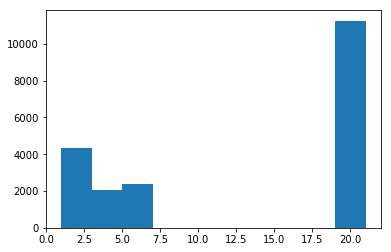

In [9]:
pyplot.hist(dati[:,50])
pyplot.show()

__Cosa deduco guardando l'istogramma?__

# Dividere i dati in categorie

Ci sarebbe comodo dividere il set "dati" in 4 categorie diverse in modo da poter accedere facilmente a tutti i b-jet, tutti i c-jet eccetera. Per farlo ci serviremo di una sintassi in python che ci permette di selezionare delle porzioni di un set di dati.

Cerchiamo di capire cosa otteniamo col codice nella cella seguente:

In [10]:
dati[dati[:,50]==1]

array([[144.63471985,  -1.22798944,   8.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 65.54579163,   0.80091989,   5.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 62.18005753,  -0.2915546 ,   7.        , ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 42.61270905,  -0.5203647 ,   4.        , ...,   0.        ,
          1.        ,   1.        ],
       [ 46.75649261,  -0.86630964,   7.        , ...,   0.        ,
          1.        ,   0.        ],
       [ 44.055233  ,   1.47807074,   9.        , ...,   0.        ,
          1.        ,   0.        ]])

Teniamo presente che ogni volta che mettiamo le parentesi quadre dopo il nome di un set stiamo essenzialmente ponendo una condizione e vogliamo che il codice ci restituisca solo la porzione del set originale che soddisfa la condizione tra parentesi.
In questo caso la condizione è: "dati[:,50]==1" il ché vuol dire che, partendo da tutti i 20000 jet, voglio che il codice mi restituisca solo quelli per cui la variabile 50 abbia valore 1, ovvero solo i jet leggeri. Possiamo usare lo stesso metodo per le altre categorie e scrivere quindi:

In [11]:
jet_leggeri = dati[dati[:,50]==1]
c_jet = dati[dati[:,50]==4]
b_jet = dati[dati[:,50]==5]
jet_gluonici = dati[dati[:,50]==21]

Usando il comando "shape" su questi set possiamo sapere esattamente quanti jet di ogni categoria ci sono nel set di partenza.<br>
__Provare e verificare che il totale ammonti a 20000.__

A questo punto è possibile creare un istogramma più esplicito:

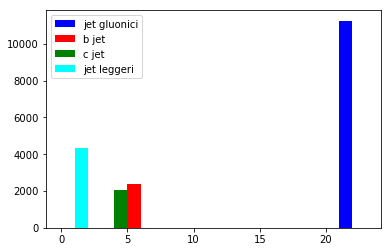

In [12]:
bins=range(0,24)
pyplot.hist(jet_gluonici[:,50], color="blue", bins=bins, label="jet gluonici")
pyplot.hist(b_jet[:,50], color="red", bins=bins, label="b jet")
pyplot.hist(c_jet[:,50], color="green", bins=bins, label="c jet")
pyplot.hist(jet_leggeri[:,50], color="cyan", bins=bins, label="jet leggeri")
pyplot.legend()
pyplot.show()

# Grafici delle variabili per categoria

Vogliamo costruire la funzione che useremo per i grafici, ma prima dobbiamo definire i seguenti vettori:

In [13]:
isB=dati[:,50]==5
isC=dati[:,50]==4
isL=dati[:,50]==1
isG=dati[:,50]==21

Il significato di questi vettori verrà spiegato in seguito.<br>
OSS: Non ci soffermiamo sul codice con cui definiamo la funzione "grafico" in quanto è complicato e poco istruttivo.

In [14]:
def grafico(  dati, categories=[isB, isC, isL, isG], labels=["b jet","c jet","jet leggeri","jet gluonici"], colors=["red","green","cyan","blue"], name="valori della variabile", log=False, mybins=None, normalizzata=False ):

    mean=numpy.mean(dati)
    stdev=numpy.std(dati)
    lenbin=stdev/(len(dati)**0.5)    
    
    if (lenbin==0) :
        return
    
    binning=numpy.arange(mean-2*stdev, mean+2*stdev, lenbin*10)    
    if mybins is not None:
      binning=mybins

    pyplot.clf()
    
    for i in range(len(categories)):
        cat=categories[i]
        color=colors[i]
        label=labels[i]
        
        if normalizzata == True:
            pyplot.hist(dati[cat], color=color, label=label, histtype='step', bins=binning, log=log, density=True)
            pyplot.ylabel("molteplicità dello stesso valore (normalizzata)")
        else: 
            pyplot.hist(dati[cat], color=color, label=label, histtype='step', bins=binning, log=log)
            pyplot.ylabel("molteplicità dello stesso valore")

    pyplot.legend()
    pyplot.xlabel(name)
    pyplot.savefig(name+".png")
    

Per fare un grafico di qualunque variabile divisa per categoria basta scrivere:

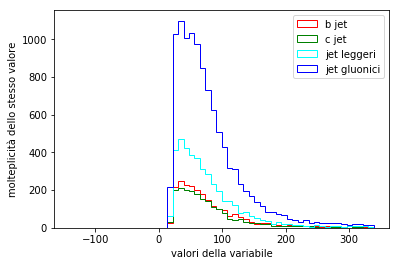

In [15]:
grafico(dati[:,0])

Dove in questo caso abbiamo graficato l'impulso trasverso (variabile 0). Per graficare qualunque altra variabile basta sostituire "0" con il numero corrispondente.

Dal grafico qui sopra possiamo notare che le 4 curve per le 4 categorie sembrano essere ciascuna una copia scalata dell'altra, dove la scala è data dalla popolosità della categoria rappresentata. In particolare la categoria dei jet gluonici è la più popolosa e infatti la figura blu è la più alta. Quello che è importante è che, a parte per l'altezza, le 4 figure sembrano non differire più di tanto nella forma e questo può solo significare che la variabile in questione ("jet_pt") assume valori che non dipendono dalla categoria di appartenenza del jet e dunque non è una buona variabile discriminante. Questo si nota facilmente se mostriamo un grafico normalizzato, ovvero in cui l'area sottesa da tutte e 4 le curve è pari a 1 (in questo caso si perde l'informazione sulla popolosità delle categorie e rimane solo la forma di distribuzione della variabile):

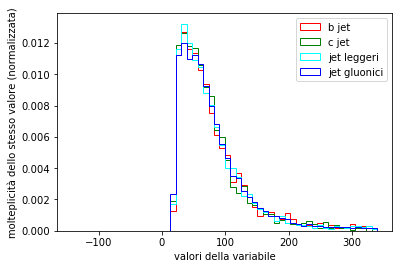

In [16]:
grafico(dati[:,0], normalizzata=True)

Vediamo che le 4 curve sembrano una ricalcare l'altra, a sostegno della tesi esplicitata poco fa.

__Provare a fare il grafico per la rapidità. Cosa concludiamo da quest'ultimo?__

# Grafici di variabili discriminanti

In questa sezione (e per il resto del notebook) ci concentreremo sulle variabili 11,13,14,15 in quanto sono quelle per cui è più facile dedurre il potere discriminante guardando i grafici. Le altre variabili della categoria hanno infatti valori troppo vicini tra di loro per ciascun jet e questo impone che all'interno dell'istogramma tutti i valori rientrano nella stessa suddivisione. Per esempio:

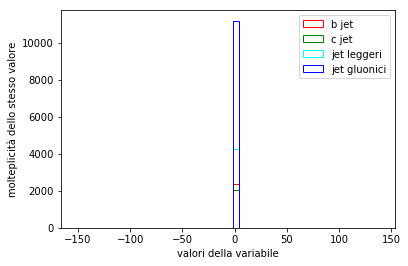

In [17]:
grafico(dati[:,7])

Il problema si potrebbe risolvere cambiando manualmente la suddivisione, ma per evitare di complicare troppo le cose ci concentriamo sulle altre variabili.

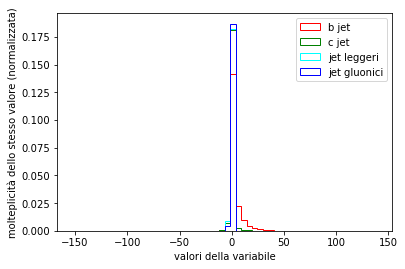

In [18]:
grafico(dati[:,11],normalizzata=True)

Per aumentare la risoluzione della zona del grafico che ci interessa possiamo applicare all'asse y una scala logaritmica in questo modo:

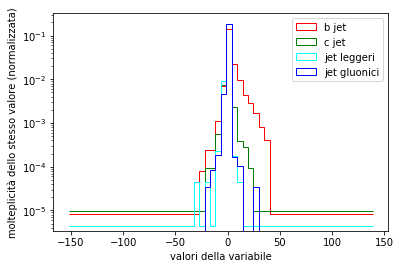

In [19]:
grafico(dati[:,11],normalizzata=True,log=True)

Da quest'ultimo grafico si nota che, a differenza dei grafici dell'impulso trasverso e della rapidità, la figura rossa è spostata leggermente verso destra rispetto a tutte le altre. Questo ci da un indizio sul fatto che questa variabile sia effettivamente dipendente dalla categoria di appartenenza del jet e in particolare dal fatto che questo sia un b-jet o meno.

__Provare a fare i grafici per le altre variabili consigliate e trarre le conclusioni. Quale ci aspettiamo (ad occhio) che sia la variabile che discrimini meglio i b-jet dagli altri?__

# L'algoritmo di discriminazione  (preliminari)

Per comprendere quello che viene dopo perdiamo un po' di tempo nello studiare una sintassi particolare in python, ci torneranno utili i vettori isB, isC, isL, isG definiti qualche cella più sopra.<br>
Attenzione: tenere presente che, nelle celle che seguono, l'aggiunta della scrittura "[:20]" è puramente una questione di praticità in quanto consente di visualizzare i primi 20 elementi dei vettori considerati.

isB è un vettore di 20000 elementi, come il numero di jet nel set. Il valore booleano (True o False) all'indice n indica se il jet n-esimo è un b-jet (True) o no (False):

In [20]:
isB[:20]

array([False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False])

Stessa cosa per isC con i c-jet, isL con i jet leggeri e isG con i jet gluonici:

In [21]:
isC[:20]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False])

In python due valori booleani si possono sommare tra loro con queste regole: 
* False + False = False
* False + True = True
* True + True = True<br>
Si ricordi inoltre che la somma di due vettori avviene elemento per elemento.<br>
Dunque nell'esempio seguente il valore booleano all'indice n indica che: 
* il jet n-esimo è un b-jet o un c-jet (True)
* il jet n-esimo NON è né un b-jet né un c-jet (False)

In [22]:
(isB+isC)[:20]

array([False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False])

Come detto prima, tra parentesi quadre c'è sempre una condizione. Nell'esempio che segue, la condizione è "isB", dunque il seguente è lo stesso vettore dell'inizio che però comprende soltanto gli eventi classificati come b-jet (infatti ha solo 2377 elementi: __verificare__), i quali sono ovviamente tutti b-jet e quindi hanno tutti valore booleano True:

In [23]:
isB[isB][:20]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

__Dunque se scrivessi: isB[isC] cosa mi aspetterei?__

Quindi il vettore che segue è lo stesso vettore di partenza ma comprende solo gli eventi classificati come b-jet (i quali hanno valore True) o come c-jet (i quali hanno valore False):

In [24]:
isB[isB+isC][:20]

array([ True,  True, False,  True,  True, False, False,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False])

__E il vettore isB[isB+isL+isG] che cos'è? Quanti elementi ha?__

Definiamoli esplicitamente:

In [25]:
isBvsC = isB[isB+isC]
isBvsLG = isB[isB+isL+isG]

Abbiamo chiamato i due vettori in questo modo in quanto il primo ci discrimina i b-jet _rispetto_ (vs) ai c-jet. Il secondo discrimina i b-jet rispetto ai jet leggeri e ai gluonici. Mentre il vettore isB discrimina i b-jet rispetto a qualunque altro tipo di jet.

Ricapitolando:
* isB è un vettore di 20000 elementi composto da valori booleani, se all'indice n il valore "isB[n]" è _False_ allora il jet n NON è un b-jet, se è True allora lo è;
* isBvsC è un vettore di 4409 elementi in quanto comprende solo quelli classificati o come b-jet o come c-jet: se all'indice n il valore "isBvsC[n]" è _False_ allora il jet n è un c-jet, se è _True_ allora è un b-jet;
* isBvsLG comprende i b-jet, i jet leggeri e i gluonici: se all'indice n il valore "isBvsLG[n]" è _False_ allora il jet n è un jet leggero o un jet gluonico, se è _True_ allora è un b-jet.

Abbiamo creato questi tre vettori diversi in quanto vogliamo capire quale dei seguenti compiti è più difficile:<br>
- Distinguere i b-jet da qualunque altro tipo di jet
- Distinguere i b-jet dai c-jet
- Distinguere i b-jet dai jet leggeri e gluonici

__In base a cosa abbiamo detto nella teoria, cosa ci aspettiamo?__

# Curve ROC e AUC

Scriviamo prima il codice dell'algoritmo utilizzando come variabile discriminante la numero 11:

In [26]:
# B vs TUTTI

fpr, tpr, soglia = roc_curve(isB,dati[:,11])
auc1 = auc(fpr, tpr)

# B vs c

fpr2, tpr2, soglia2 = roc_curve(isBvsC,dati[:,11][isB+isC])
auc2 = auc(fpr2, tpr2)

# B vs leggeri e gluonici

fpr3, tpr3, soglia3 = roc_curve(isBvsLG, dati[:,11][isB+isL+isG])
auc3 = auc(fpr3, tpr3)

### Il caso b vs tutti

Per capire come funziona l'algoritmo analizziamo prima il caso b vs tutti. Visualizziamo per prima cosa il vettore "soglia" che ci viene restituito:

In [27]:
soglia.shape

(2744,)

In [28]:
soglia[:20]

array([41.10481262, 40.10481262, 27.75101662, 26.91142273, 20.77487183,
       20.62183952, 17.18819618, 17.15910149, 17.02704048, 17.02688789,
       16.49670792, 16.48767662, 12.66849899, 12.61098862, 11.32164288,
       11.3081913 , 11.21467113, 11.19307518, 10.64703846, 10.64122581])

In [29]:
soglia[-20:] # Scrittura analoga a "soglia[2724:]" -> Seleziona solo gli ultimi 20 elementi

array([  -7.97987986,   -8.84355068,   -9.10871029,   -9.30560589,
        -10.1924324 ,  -10.19857216,  -10.39178848,  -11.15960217,
        -11.52142143,  -11.54287052,  -12.72215271,  -13.31455231,
        -15.60561466,  -16.61683464,  -18.15948868,  -19.9670639 ,
        -20.31702995,  -26.25210953,  -30.22772789, -999.        ])

La soglia parte da un valore arbitrario maggiore del valore massimo assunto dalla variabile discriminante utilizzata nell'algoritmo:<br>
max(soglia) = soglia[0] > max(data[:,11])<br>
Inoltre i suoi valori sono strettamente decrescenti e l'ultimo elemento è minore del valore minimo assunto dalla variabile discriminante:<br>
min(soglia) = soglia[2744] < min(data[:,11])<br>

L'algoritmo in se è composto in questo caso da 2744 step, corrispondente al numero di elementi nel vettore soglia. Al primo step:
* Si prende il valore del primo elemento di soglia, nel nostro caso 41.105;
* Si mette a confronto questo numero con TUTTI i valori contenuti nel vettore "data[:,11]";
* Ogni valore del vettore che sia maggiore di 41.105 viene etichettato come "positivo";
* Ogni valore del vettore che sia minore di 41.105 viene etichettato come "negativo";<br>
"positivo" e "negativo" vanno pensate come ipotesi: un valore etichettato come positvo è un valore che si ipotizza essere associato a un b-jet, un valore etichettato come negativo si ipotizza NON essere associato a un b-jet.<br>
Essendo che il primo valore di soglia è per costruzione maggiore di qualunque valore all'interno di data[:,11], segue che al primo step ogni valore verrà etichettato come negativo.<br>
L'algoritmo prosegue step dopo step prendendo ogni volta l'elemento di soglia successivo, e etichettando ad ogni step tutti i valori in data[:,11] come positivi o negativi.<br>
Naturalmente, essendo che l'ultimo valore di soglia è minore di ogni valore in data[:,11], all'ultimo step tutti gli elementi in data[:,11] verranno etichettati come positivi.<br>

### Confronto ipotesi con verità
All'interno di ogni step, dopo la fase di separazione in positivi e negativi, ci ritroviamo con un vettore di elementi booleani (in questo caso il vettore avrà 20000 elementi in quanto siamo nella situazione b vs tutti), chiamiamo questo vettore "ipotesi". Il valore ipotesi[n] corrisponde appunto all'ipotesi sul fatto che il jet n-esimo sia un b-jet o meno. Questo valore andrà confrontato con qualcosa, ovvero con il valore isB[n] che corrisponde alla verità sul jet n-esimo. Infatti un valore True di isB[n] ci indica che il jet n-esimo è un b-jet e viceversa.<br>
Confrontando il valore ipotesi[n] col valore isB[n] possono risultare i seguenti casi:
* ipotesi[n] = isB[n] = True -> Vero Positivo (_True Positive_), ovvero abbiamo ipotizzato correttamente che il jet n-esimo fosse un b-jet;
* ipotesi[n] = isB[n] = False -> Vero Negativo (_True Negative_), ovvero abbiamo ipotizzato correttamente che il jet n-esimo NON fosse un b-jet;
* ipotesi[n] = True, isB[n] = False -> Falso Positivo (_False Positive_), ovvero abbiamo ipotizzato che il jet n-esimo fosse un b-jet mentre in realtà non lo è;
* ipotesi[n] = False, isB[n] = True -> Falso Negativo (_False Negative_), ovvero abbiamo ipotizzato che il jet n-esimo NON fosse un b-jet mentre in realtà lo è.<br>
A ogni step andranno fatti tutti i 20000 confronti (per n che va da 0 a 19999).

_Il discorso è analogo per tutti gli altri casi (B vs C, B vs LG) con la differenza che il vettore ipotesi e il vettore verità avranno meno di 20000 elementi._

### Costruire la curva ROC
La curva ROC (receiver operating characteristic) è un grafico che ha sulle ascisse il _numero di falsi positivi diviso per il numero totale di negativi_ (totale negativi = veri negativi + falsi positivi) detto anche false positive rate o fpr, e sulle ordinate il _numero di veri positivi diviso per il numero totale di positivi_ (totale positivi = veri positivi + falsi negativi) detto anche true positive rate o tpr. La ROC si costruisce nel nostro caso (come detto in precedenza) in 2744 step, ogni step corrisponde a un valore di soglia diverso:
* Si parte dal primo valore di soglia;
* Si segna sul grafico il punto che corrisponde al numero di veri positivi e falsi positivi ottenuti con tale valore di soglia;<br>
Osservazione: il primo valore di soglia è tale per cui non si avrà nemmeno un falso positivo e nemmeno un vero positivo (in quanto nessun valore sarà ipotizzato come positivo), dunque il primo punto sarà sempre in (0,0).
* Si procede così per tutti gli altri valori di soglia segnando punto per punto, per poi unire tutti i punti.<br>
Osservazione: l'ultimo valore di soglia è tale per cui tutti i jet vengono etichettati come positivi, dunque tutti i negativi vengono erroneamente ipotizzati positivi e tutti i positivi vengono correttamente ipotizzati positivi, quindi l'ultimo punto sarà sempre in (1,1).

Ecco la curva ROC creata dall'algoritmo precedente:

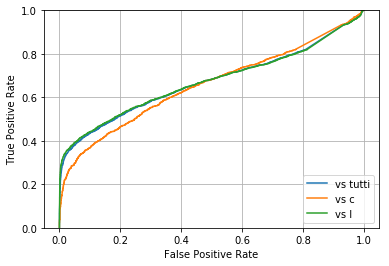

In [30]:
pyplot.plot(fpr,tpr,label="vs tutti")
pyplot.plot(fpr2,tpr2,label="vs c")
pyplot.plot(fpr3,tpr3,label="vs l")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")
pyplot.ylim(0.000001,1)
pyplot.grid(True)
pyplot.legend(loc='lower right')
pyplot.show()

### AUC
Un criterio semplice per valutare l'efficienza di una variabile discriminante è questo:<br>
_"All'aumentare del fpr, più il tpr aumenta di conseguenza più la variabile è efficiente"_<br>
__Provare a ragionarci sopra, perché ha senso?__

Ovvero, riferendoci alla figura qui sopra, più la curva risulta "schiacciata" contro il margine superiore del grafico, meglio è. Il ché equivale a dire: _più l'integrale della curva ROC è alto, più la variabile è efficiente._<br>
L'integrale della curva ROC ha un nome, si chiama AUC (area under the curve) e fortunatamete ci viene fornito direttamente dal nostro algoritmo.

In [31]:
print (auc1, auc2, auc3)

0.6702144535131177 0.6551470125447613 0.6721782172260098


Il grafico sopra contiene tre curve ROC, come avevamo anticipato volevamo scoprire quale dei jet fosse più difficile da distinguere dal b-jet:<br>
__Cosa si deduce dalle curve? Ciò rispecchia quello che ci aspettiamo dalla teoria?__

__Provare a costruire le curve ROC per tutte le variabili consigliate__ (per farlo basta sostituire nell'algoritmo dove c'è "data[:,11]", al posto di 11 un altro numero)<br>

__Confrontare le AUC per tutte queste variabili, qual è la variabile discriminante più efficiente?__